Sampling: [a_trunc_normal]


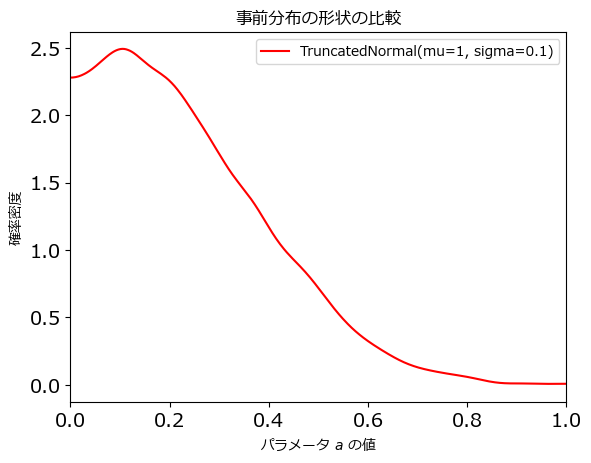

In [1]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

# --- 0. プロット設定 ---
plt.rcParams['font.family'] = "Meiryo"
plt.rcParams['figure.dpi'] = 100

# 2つの事前分布を比較
with pm.Model():
    a_trunc_normal = pm.TruncatedNormal('a_trunc_normal', mu=0.1, sigma=0.25, lower=0.0, upper=1.0)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

az.plot_dist(prior_samples.prior['a_trunc_normal'], label='TruncatedNormal(mu=1, sigma=0.1)', color='red')
plt.title('事前分布の形状の比較')
plt.xlabel('パラメータ $a$ の値')
plt.ylabel('確率密度')
plt.legend()
plt.xlim(0, 1.0)
plt.show()


Sampling: [gamma]


gamma パラメータの実際の平均値: 1.08e+11
設定した目標平均値: 1.10e+11
使用したsigma値: 1.38e+11


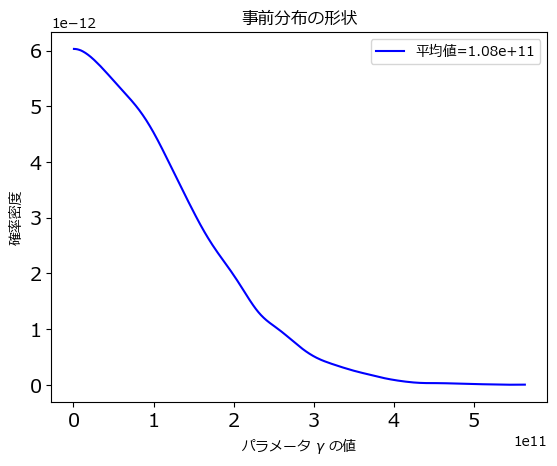

In [4]:
with pm.Model():
    # HalfNormal分布で平均値を110e9にするため、sigma値を計算
    # HalfNormal分布の平均値 = sigma * sqrt(2/π)
    # 110e9 = sigma * sqrt(2/π) → sigma = 110e9 / sqrt(2/π)
    import numpy as np
    desired_mean = 110e9
    sigma_value = desired_mean / np.sqrt(2 / np.pi)
    
    gamma_param = pm.HalfNormal('gamma', sigma=sigma_value)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

# 実際の平均値を計算して表示
actual_mean = np.mean(prior_samples.prior['gamma'])
print(f"gamma パラメータの実際の平均値: {actual_mean:.2e}")
print(f"設定した目標平均値: {desired_mean:.2e}")
print(f"使用したsigma値: {sigma_value:.2e}")

az.plot_dist(prior_samples.prior['gamma'], label=f'平均値={actual_mean:.2e}', color='blue')
plt.title('事前分布の形状')
plt.xlabel('パラメータ $\gamma$ の値')                                      
plt.ylabel('確率密度')
plt.legend()
plt.show()


Sampling: [sigma]


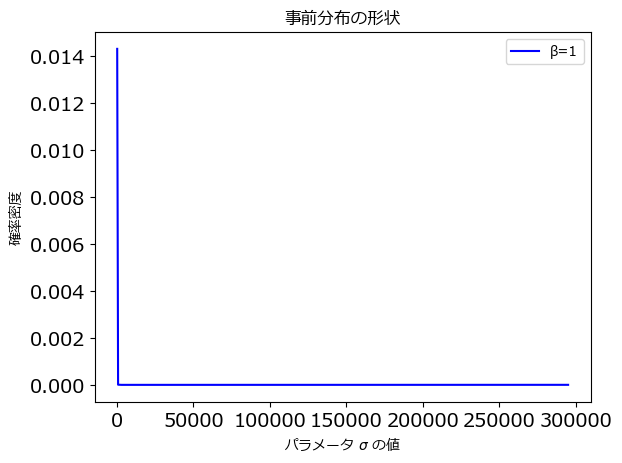

In [3]:
with pm.Model():
    sigma_obs = pm.HalfCauchy('sigma', beta=1.0)

    prior_samples = pm.sample_prior_predictive(samples=10000, random_seed=42)

az.plot_dist(prior_samples.prior['sigma'], label='β=1', color='blue')
plt.title('事前分布の形状')
plt.xlabel('パラメータ $\sigma$ の値')
plt.ylabel('確率密度')
plt.legend()
plt.show()

In [4]:
d = 0.1578e-3
c = 3.0e+8
w_j = 0.25e12

n = c / 2 / d / w_j
eps_r = n**2
print(eps_r) 

14.457343607685525
